In [1]:
from typing import Tuple, List, Dict
import matplotlib.pyplot as plt
import json
import numpy as np

from clusterexp.utils import (
    get_list_datasets, get_list_exp, load_json,
    URL_ROOT, PATH_UCR_LOCAL, PATH_UCR_REMOTE
)

In [2]:
f_artificial = "./res/analysis_datasets-artificial.json"
f_real = "./res/analysis_datasets-real-world.json"

d_artificial = load_json(f_artificial)
d_real = load_json(f_real)
n_total_artificial = len(d_artificial)
n_total_real = len(d_real)

In [3]:
def count_successful_dataset(dict_analysis: dict) -> int:
    """
    Count the number of successful datasets.

    Parameters
    ----------
    dict_analysis : dict
        The dictionary containing the result of analysis the datasets.

    Returns
    -------
    int
        The number of successful datasets.
    """
    n_success = 0
    for dataset, d_dataset in dict_analysis.items():
        if d_dataset["success"]:
            n_success += 1
    return n_success

print(count_successful_dataset(d_artificial))
print(count_successful_dataset(d_real))

104
14


Based on output above enough datasets are "successful" (i.e. the correct number of cluster was selected at least once by one of the CVI for one of the clustering method)

________________

In [4]:
def find_best_VI_true(
    dict_analysis: dict,
) -> List[float]:
    """
    For each dataset, find the best VI_true among the clustering methods.

    Parameters
    ----------
    dict_analysis : dict
        The dictionary containing the result of analysis the datasets.

    Returns
    -------
    List[float]
        The best VI_true among the clustering methods for each dataset.
    """
    best_VI_true = []
    for dataset, d_dataset in dict_analysis.items():
        all_VI_true = []
        for algo, d_algo in d_dataset["exps"].items():
            all_VI_true.append(d_algo["VI_true"])
        best_VI_true.append(min(all_VI_true))
    return best_VI_true


best_VI_artificial = find_best_VI_true(d_artificial)
best_VI_real = find_best_VI_true(d_real)
print(best_VI_artificial)
print(best_VI_real)

def count_successful_VI_true(
    dict_analysis: dict,
    VI_max: float = 0.2
) -> Tuple[List[float], int]:
    """
    Count the number of datasets with a high enough VI_true.

    Parameters
    ----------
    dict_analysis : dict
        The dictionary containing the result of analysis the datasets.
    VI_max : float
        The VI_true threshold.

    Returns
    -------
    Tuple[List[float], int]
        The number of successful datasets (VI_true < VI_max).
    """
    best_VI_true = find_best_VI_true(dict_analysis)
    successful_VIs = [VI for VI in best_VI_true if VI < VI_max]
    n_success = len(successful_VIs)
    return successful_VIs, n_success

print(count_successful_VI_true(d_artificial))
print(count_successful_VI_true(d_real))

[4.440892098500626e-16, 0.0, 1.7902639571521097, 0.8840795570630834, 4.440892098500626e-16, 0.0, 1.0080095506555575, 0.9852354243361205, 2.5569819304138335, 0.0, 0.474686900995485, 0.06388671146613678, 0.0, 0.0, 0.8916688918236316, 0.2848768857725341, 1.0042809628080178, 1.0067118286062033, 1.412821728690472, 1.3381509364176174, 0.8581013970382853, 1.0794411436559654, 0.2909428573374311, 2.8270946523047886, 0.7736085052946907, 0.7817849058774082, 0.0, 1.8248987318829961, 0.21931799517620298, 0.4386298663059405, 0.0, 0.2175317608971139, 0.12026787424531626, 0.27310969285298414, 1.3192382078391987, 1.6030277802434907, 0.08750629422551048, 0.40521256114043025, 0.0, 0.4676036446098051, 1.7763568394002505e-15, 0.0, 0.0, 0.0, -0.0, 0.8976068803367786, 0.0, 1.0094063135980398, 0.0, 0.0813601502764083, 0.2585444724357546, 0.7805625185457785, 0.0, 0.0, 0.0, 0.7251616758843825, 0.0, 0.0, 1.0094063135980398, 0.0, 0.0, 0.0, 0.2773610081359177, -8.881784197001252e-16, 0.0, 0.26883572300971803, 1.32

- Based on the output above, it seems like none of the real dataset was well enough clustered by the clustering method, evem when assuming the correct number of clusters (and even if the correct clustering was still somehow correctly selected by some CVIs)
- Half of the toy datasets seem to be well enough clustered, while the other half is not.

________________________________________

Text(0.5, 1.0, 'Distribution of VI_k_true ')

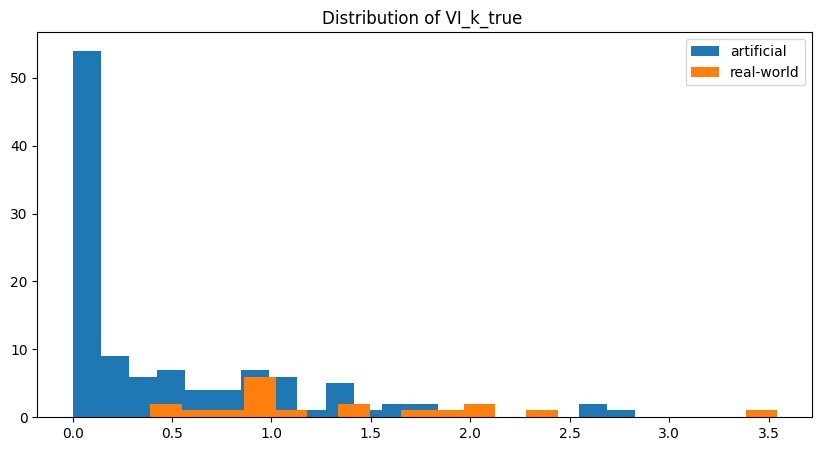

In [5]:
fig, ax = plt.subplots(figsize=(10,5))

ax.hist(best_VI_artificial, bins= 20, label="artificial")
ax.hist(best_VI_real, bins= 20, label="real-world")
ax.legend()
ax.set_title("Distribution of VI_k_true ")

We can see that there is a huge difference between the VI of the artificial datasets and the real-world datasets. Unfortunately, due to the fact that the real-world data has high dimensions, it is hard to visualise how acceptable the VI values are. But based on VI values on artificial datasets and their corresponding visualisation, we can assume that none of the real-world clustering are actually good enough.

________________________________________

Text(0.5, 1.0, 'Frequency of k_true')

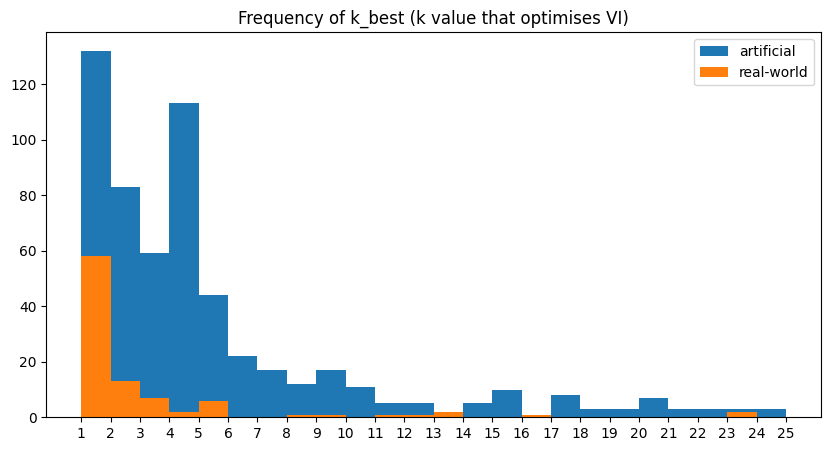

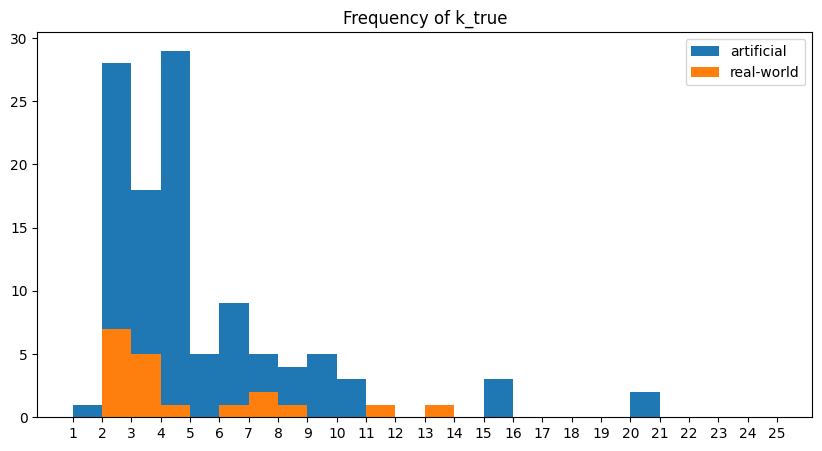

In [6]:
def distrib_k_best(dict_analysis : dict) -> List[int]:
    """
    For each experiment, find the k_best (k that minimizes VI)

    Parameters
    ----------
    dict_analysis : dict
        The dictionary containing the result of analysis the datasets.

    Returns
    -------
    List[int]
        A flattened list of k_best for all experiments
    """
    list_k_best = []
    for dataset, d_dataset in dict_analysis.items():
        list_k_best += d_dataset["k_best"]
    list_k_best = [int(k) for k in list_k_best]
    return list_k_best

def distrib_k_true(dict_analysis : dict) -> List[int]:
    """
    For each experiment, find the k_best (k that minimizes VI)

    Parameters
    ----------
    dict_analysis : dict
        The dictionary containing the result of analysis the datasets.

    Returns
    -------
    List[int]
        A flattened list of k_best for all experiments
    """
    list_k_true = []
    for dataset, d_dataset in dict_analysis.items():
        list_k_true.append(d_dataset["k_true"])
    list_k_true = [int(k) for k in list_k_true]
    return list_k_true

k_best_artificial = distrib_k_best(d_artificial)
k_best_real = distrib_k_best(d_real)

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(sorted(k_best_artificial), bins= range(1,26), label="artificial")
ax.hist(sorted(k_best_real), bins= range(1,26), label="real-world")
ax.set_xticks(range(1,26))
ax.legend()
ax.set_title("Frequency of k_best (k value that optimises VI)")


k_true_artificial = distrib_k_true(d_artificial)
k_true_real = distrib_k_true(d_real)

fig, ax = plt.subplots(figsize=(10,5))

ax.hist(sorted(k_true_artificial), bins= range(1,26), label="artificial")
ax.hist(sorted(k_true_real), bins= range(1,26), label="real-world")
ax.set_xticks(range(1,26))
ax.legend()
ax.set_title("Frequency of k_true")

Many things can be said on the figures above:

- The peaks visible in the k_true are also visible in k_best. This means that the clusterings assuming the correct number of clusters also give the best VI values. 
- There is however one difference: The peak for k = 2 is higher for k_true than for k_best and it seems to be shifted to k_best = 1 instead. The could be a good thing or not so bad thing, if the case with k_true = 2 are actually very noisy / imbalanced / subclusters, etc. This could show that k = 1 could be a relevant option as well. To be further investigated with plotted examples.

_______________________________________________________

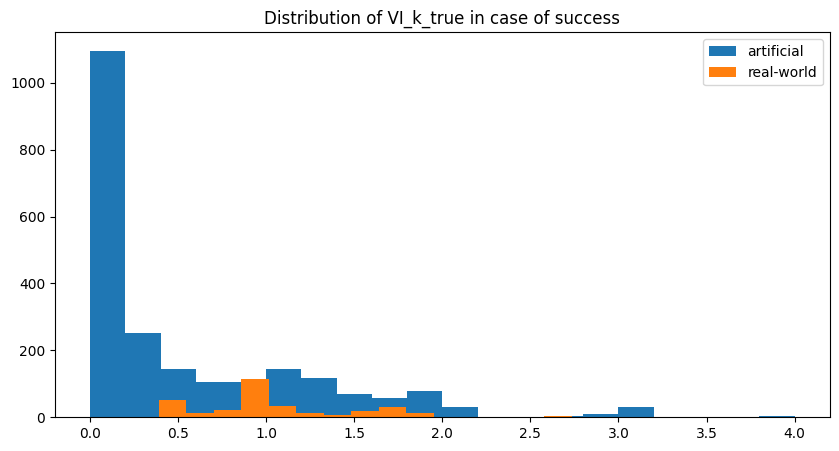

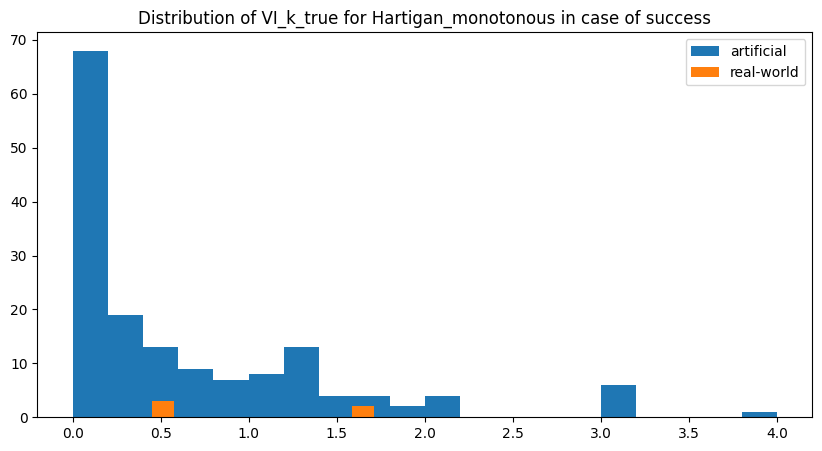

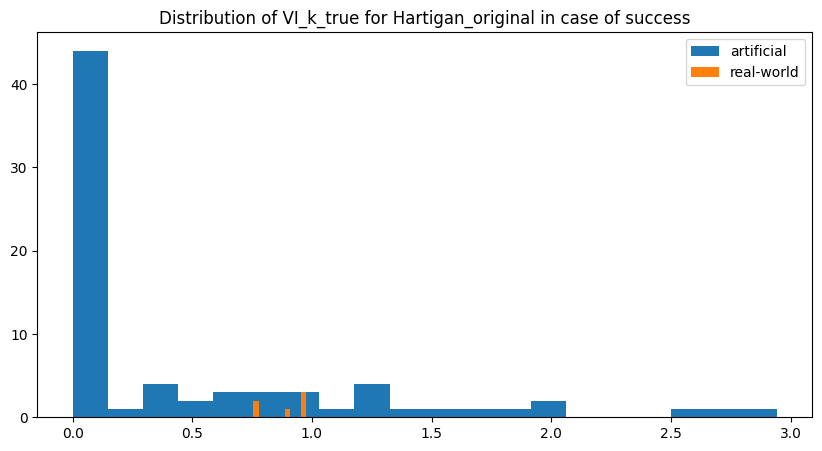

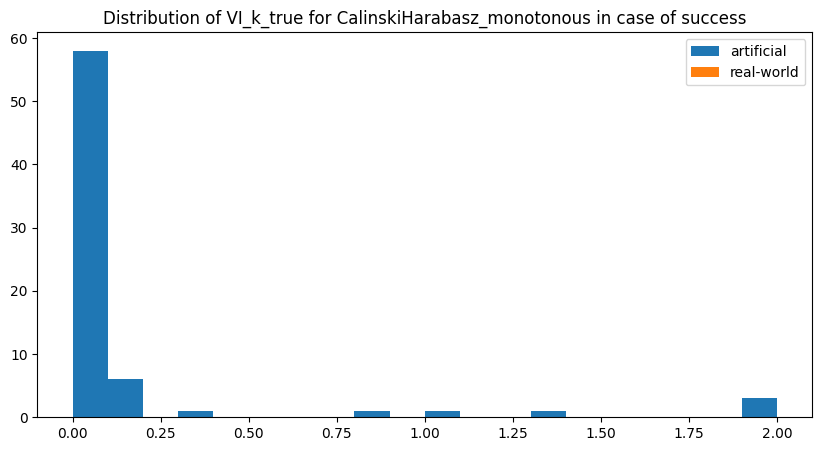

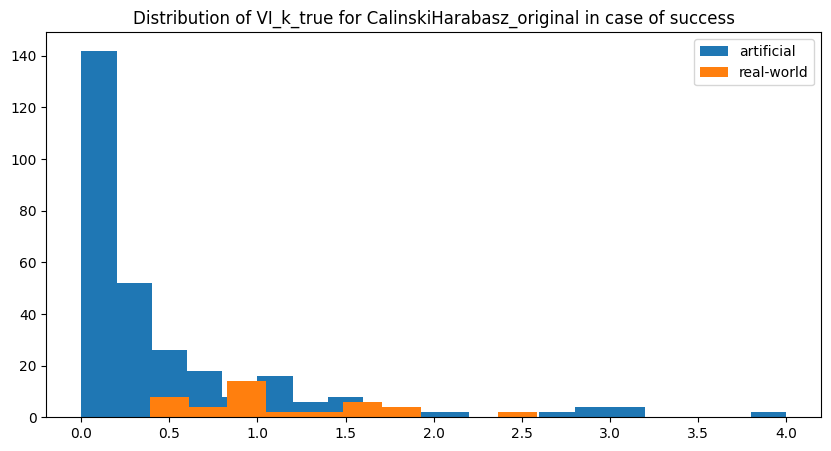

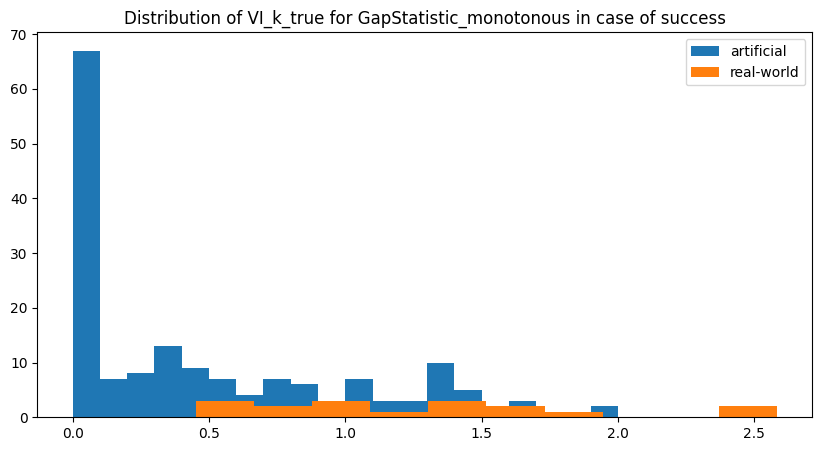

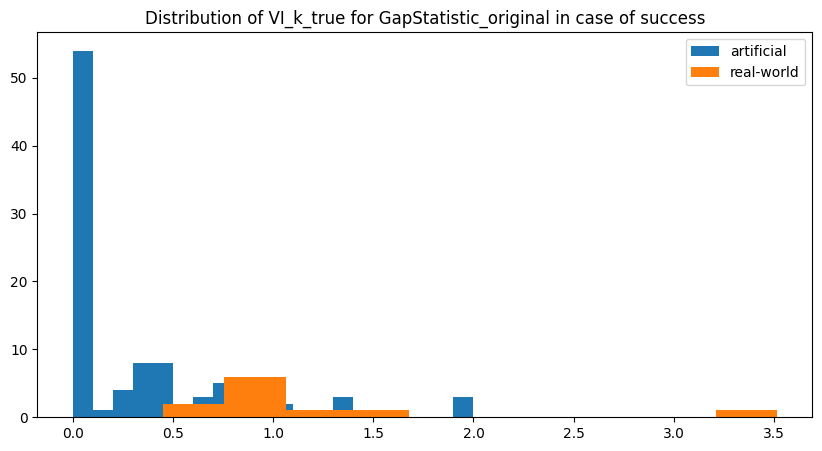

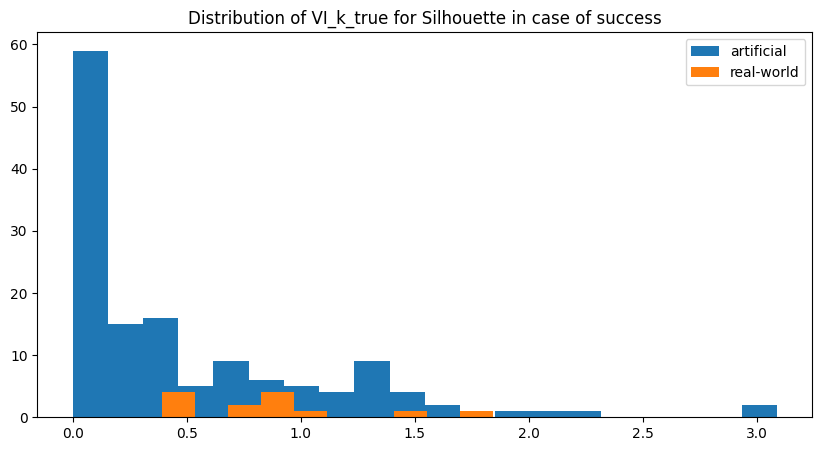

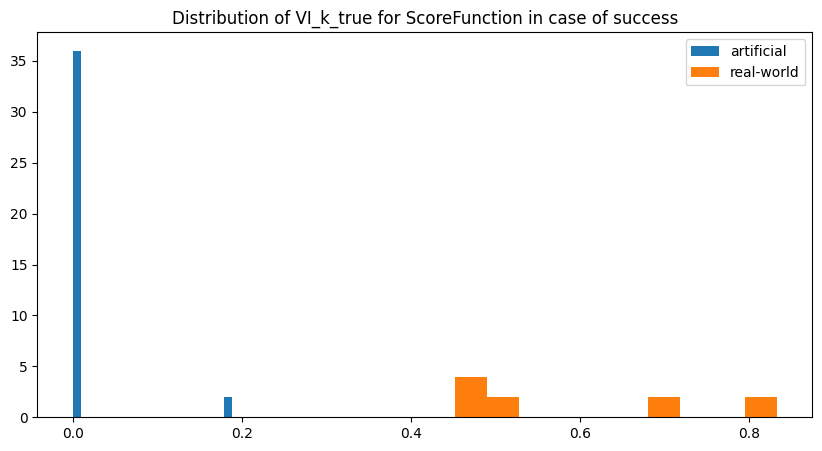

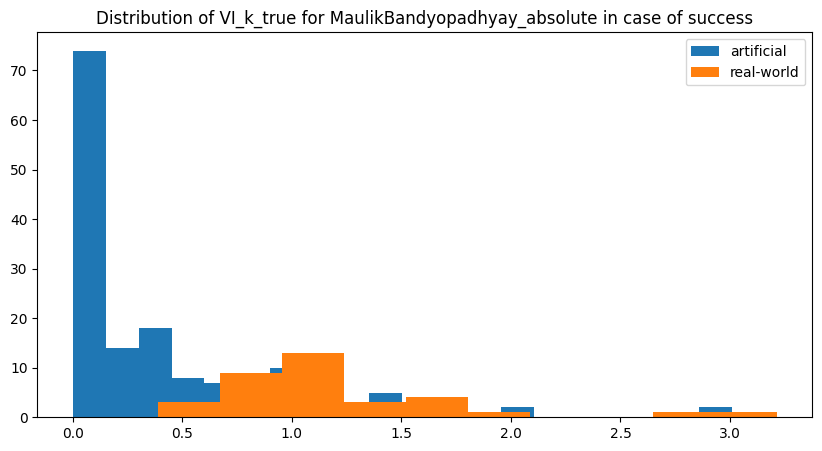

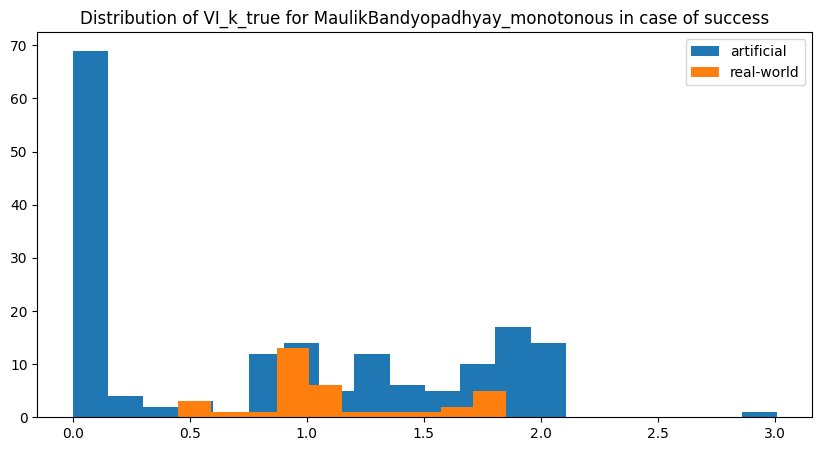

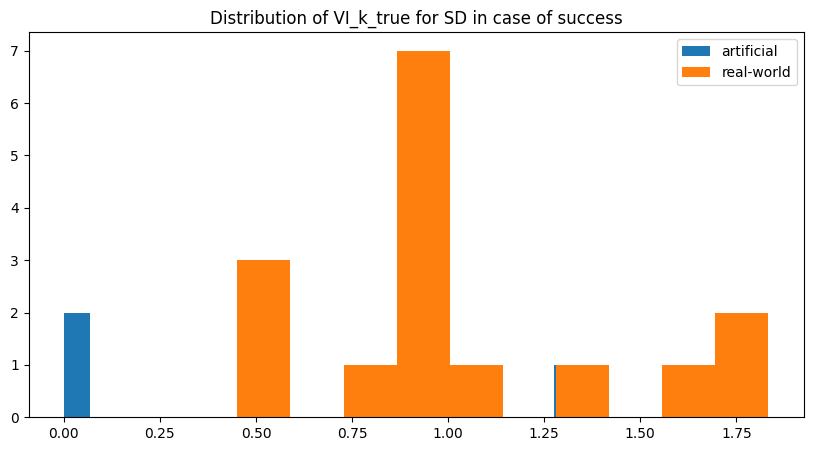

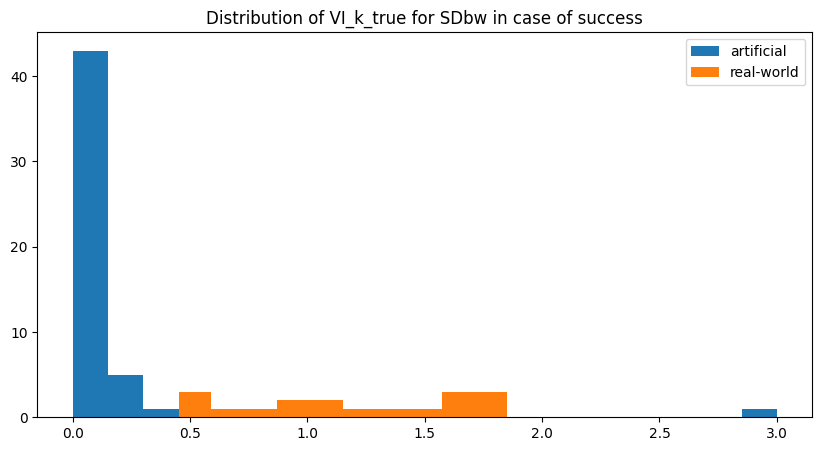

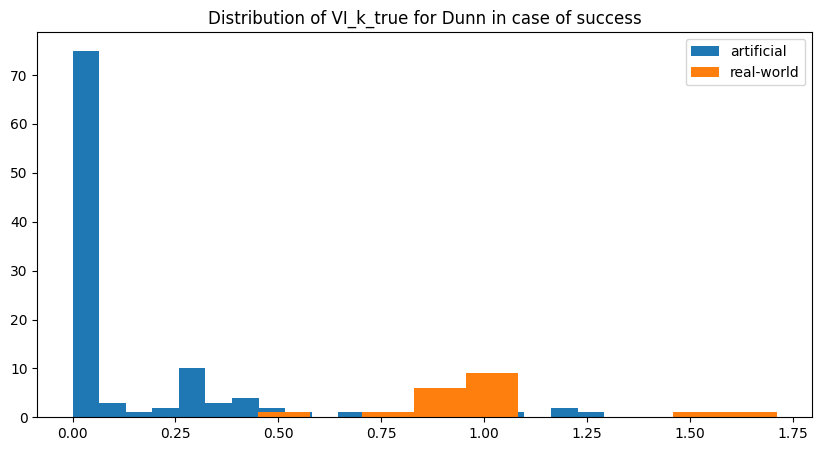

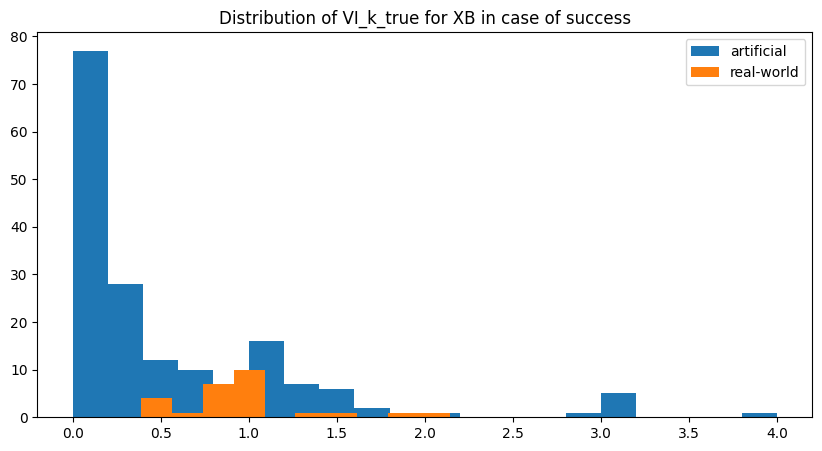

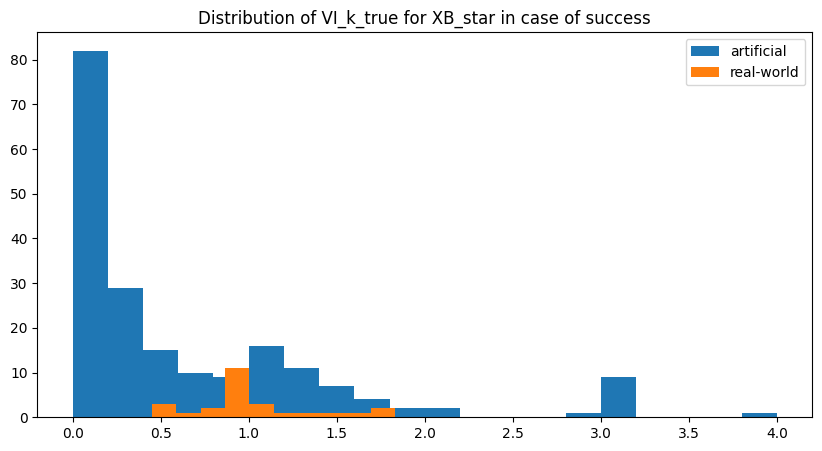

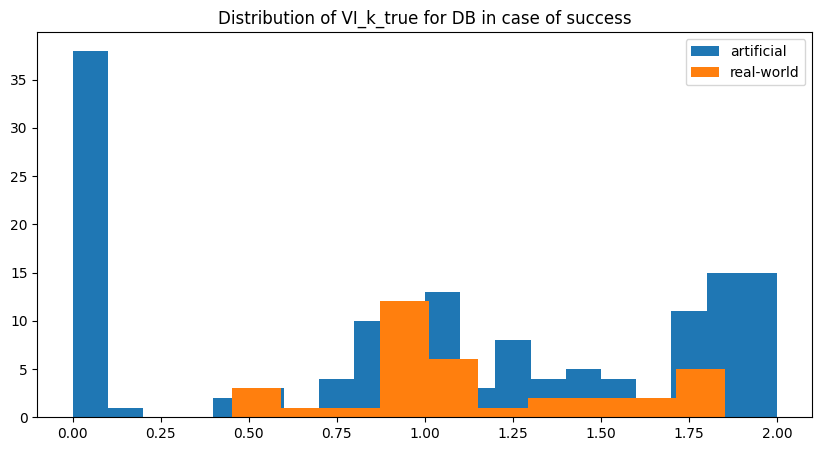

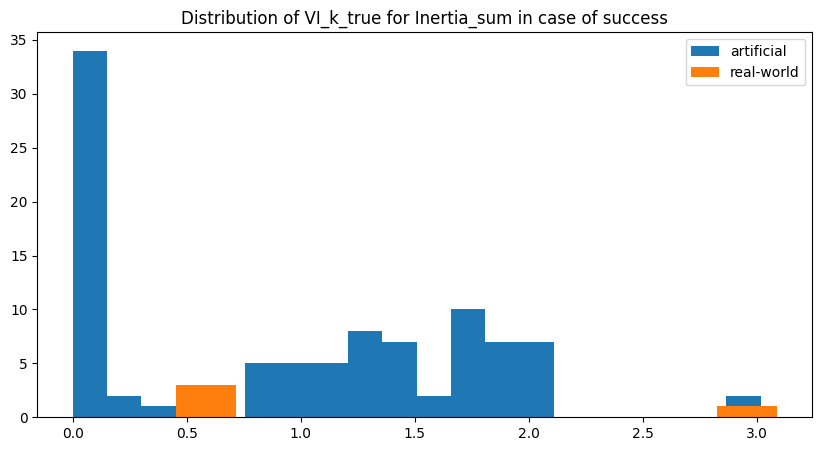

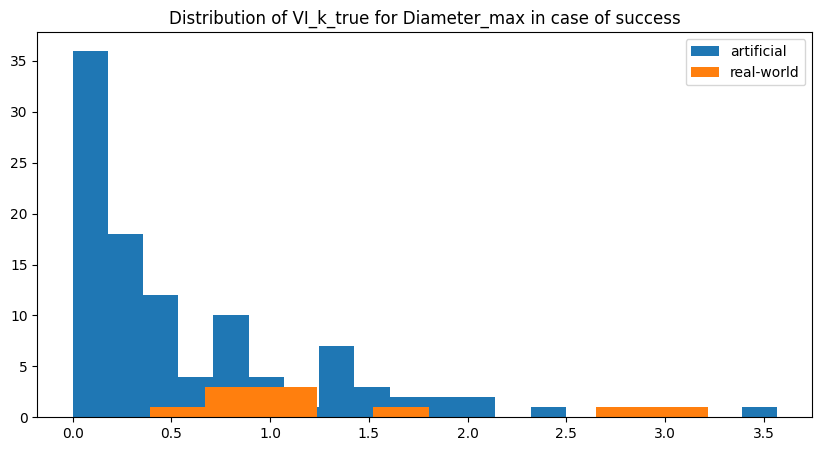

In [7]:
def VI_success(
    dict_analysis: dict
) -> Tuple[List[float], Dict[str, List[float]]]:
    """
    Find VI_k_true for all successful experiments.

    Parameters
    ----------
    dict_analysis : dict
        The dictionary containing the result of analysis the datasets.

    Returns
    -------
    Tuple[List[float], Dict[str, List[float]]]
        VI_k_true for all successful experiments, and then CVI by CVI.
    """
    all_VI_success = []
    VI_success_cvi = {}
    for dataset, d_dataset in dict_analysis.items():
        for cvi, d_cvi in d_dataset["CVIs"].items():
            VI_success_cvi[cvi] = []
    for dataset, d_dataset in dict_analysis.items():
        for cvi, d_cvi in d_dataset["CVIs"].items():
            VI_kept = [
                vi for i, vi in enumerate(d_cvi["VIs_true"])
                if d_cvi["success"][i]
            ]
            all_VI_success += VI_kept
            VI_success_cvi[cvi] += VI_kept

    return all_VI_success, VI_success_cvi

VI_success_artificial, VI_success_cvi_artificial = VI_success(d_artificial)
VI_success_real, VI_success_cvi_real = VI_success(d_real)


fig, ax = plt.subplots(figsize=(10,5))

ax.hist(VI_success_artificial, bins= 20, label="artificial")
ax.hist(VI_success_real, bins= 20, label="real-world")
ax.legend()
ax.set_title("Distribution of VI_k_true in case of success")

CVIs = list(VI_success_cvi_artificial.keys())


for cvi in CVIs:
    fig, ax = plt.subplots(figsize=(10,5))

    ax.hist(VI_success_cvi_artificial[cvi], bins=20, label="artificial")
    ax.hist(VI_success_cvi_real[cvi], label="real-world")
    ax.legend()
    ax.set_title(f"Distribution of VI_k_true for {cvi} in case of success")

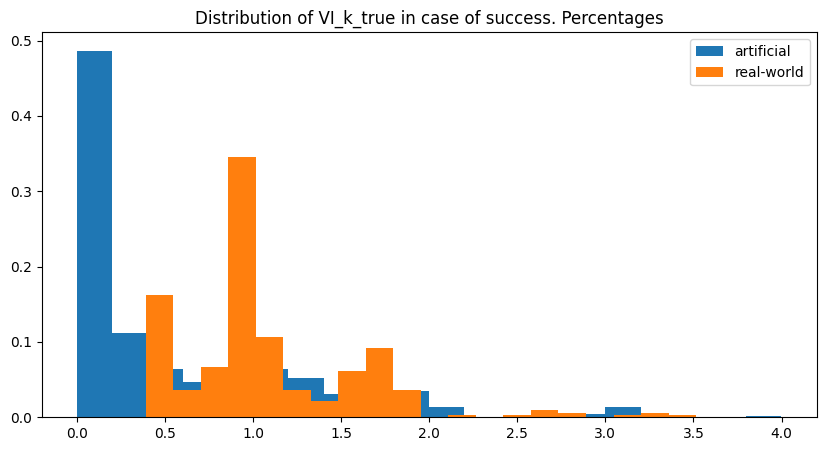

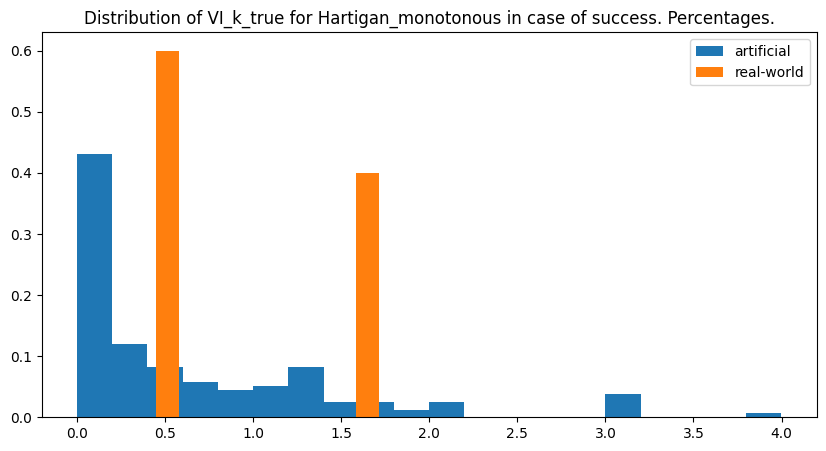

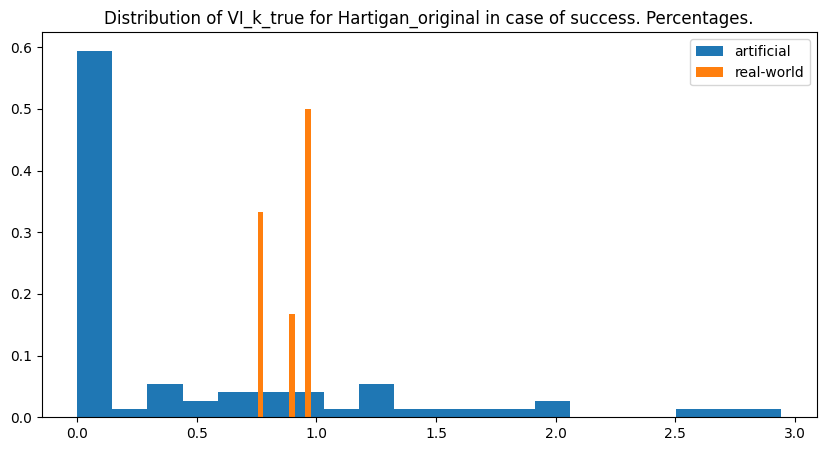

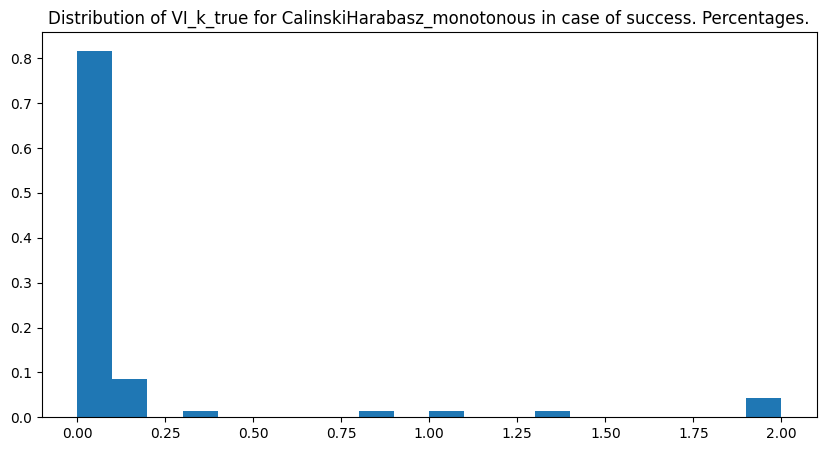

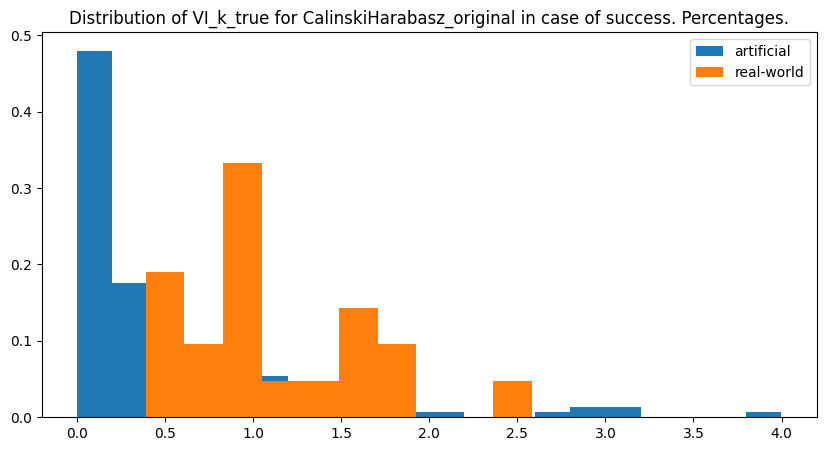

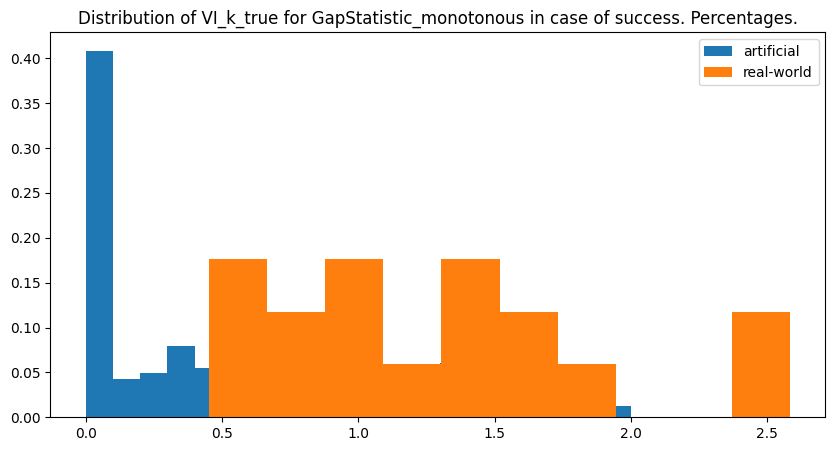

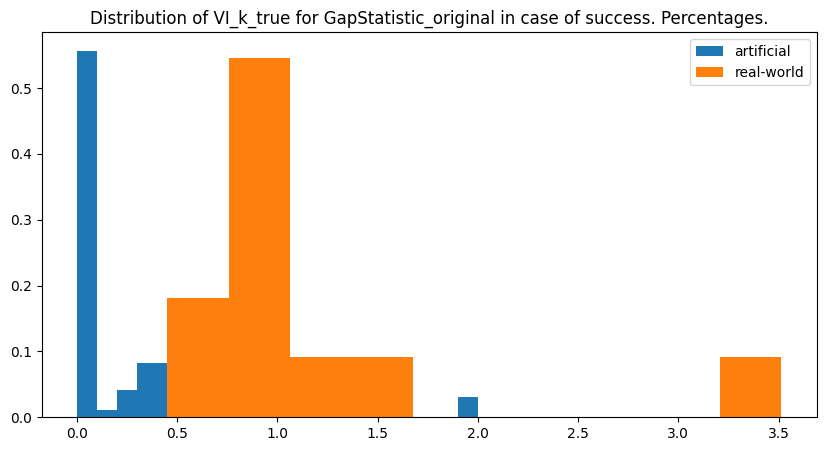

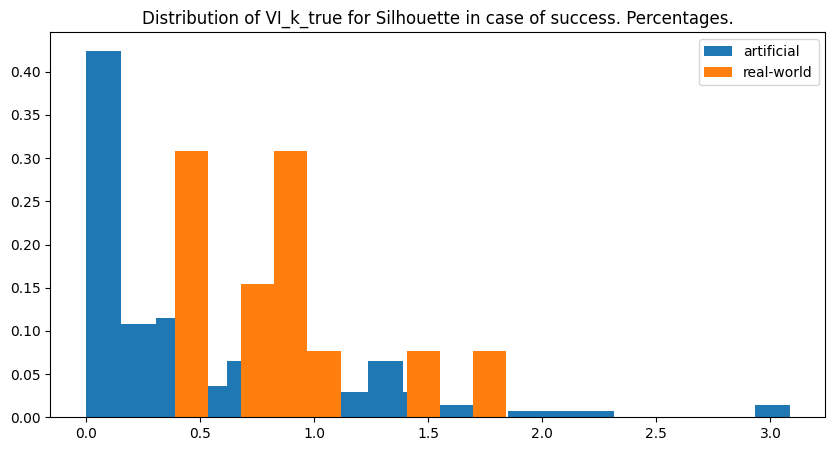

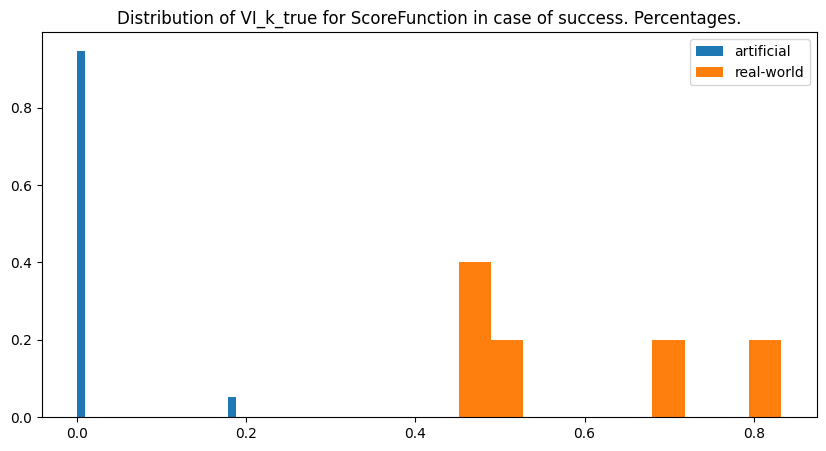

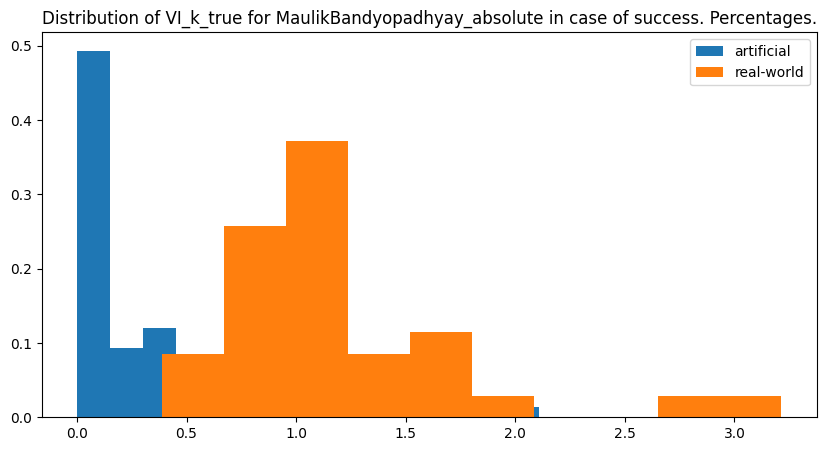

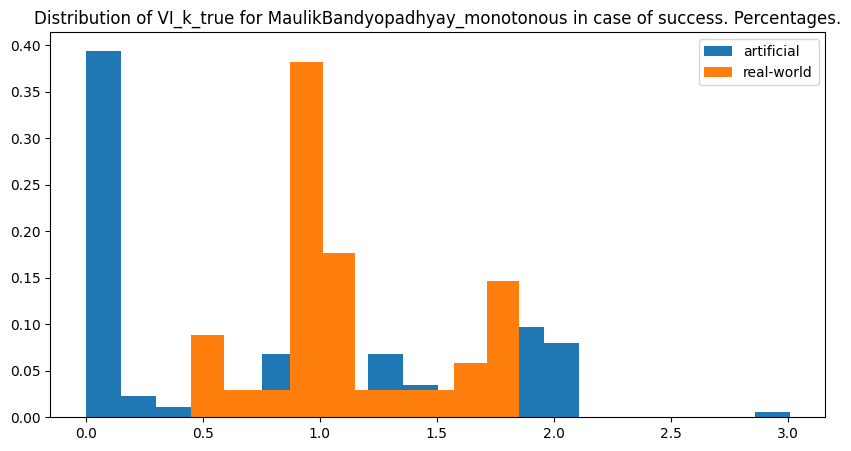

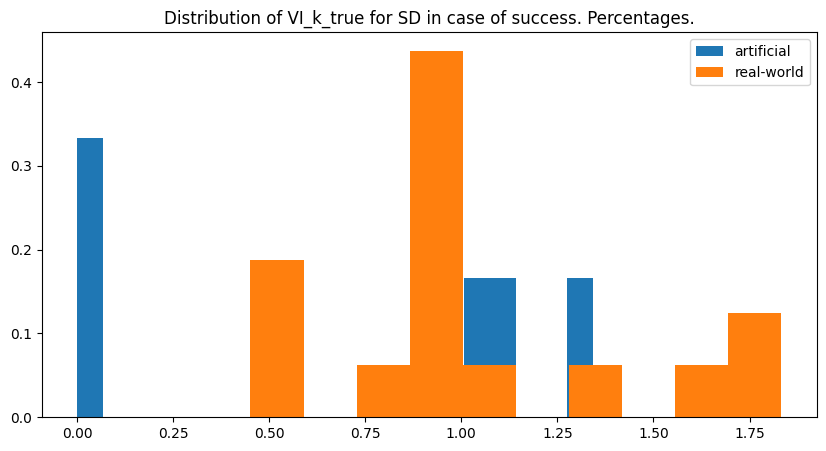

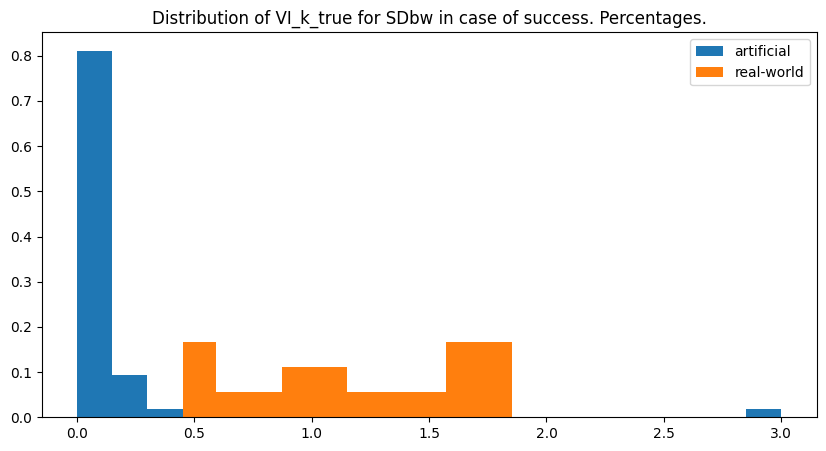

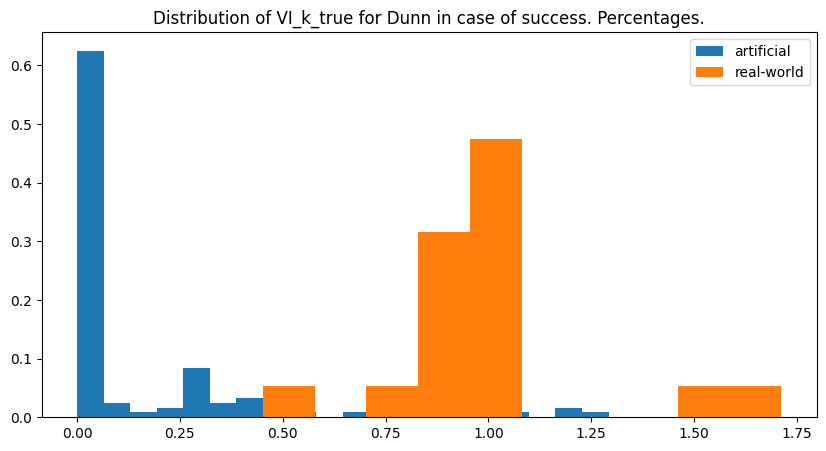

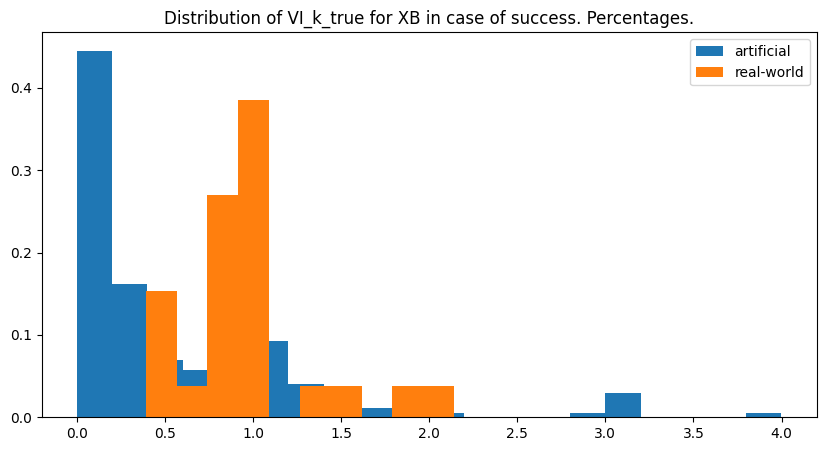

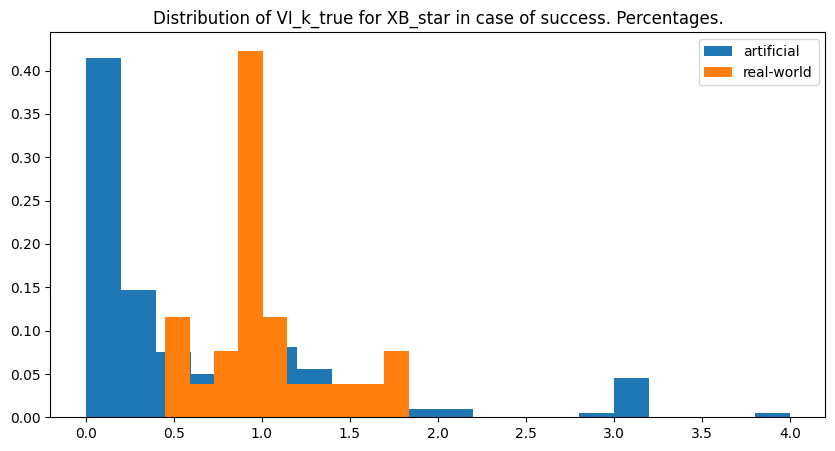

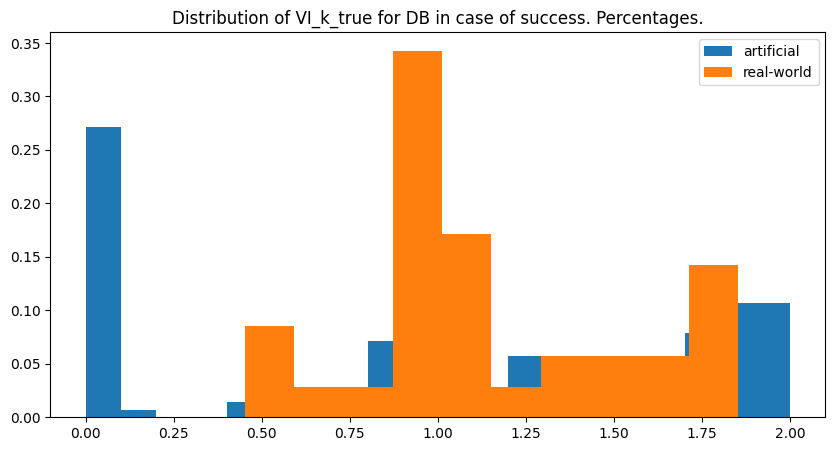

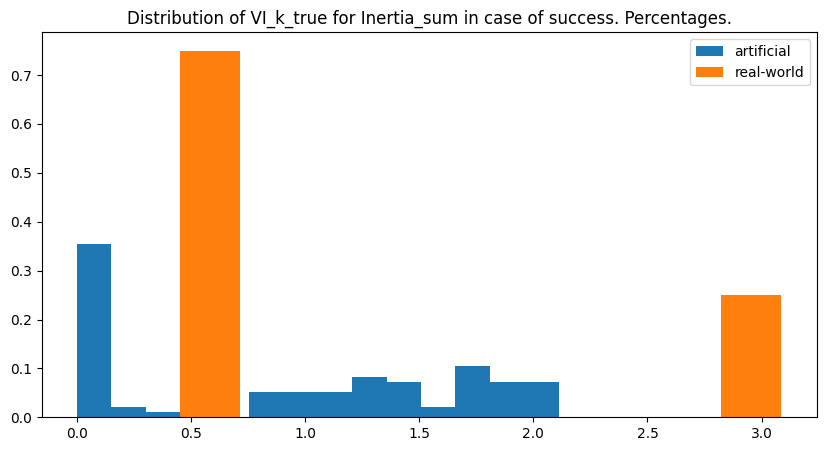

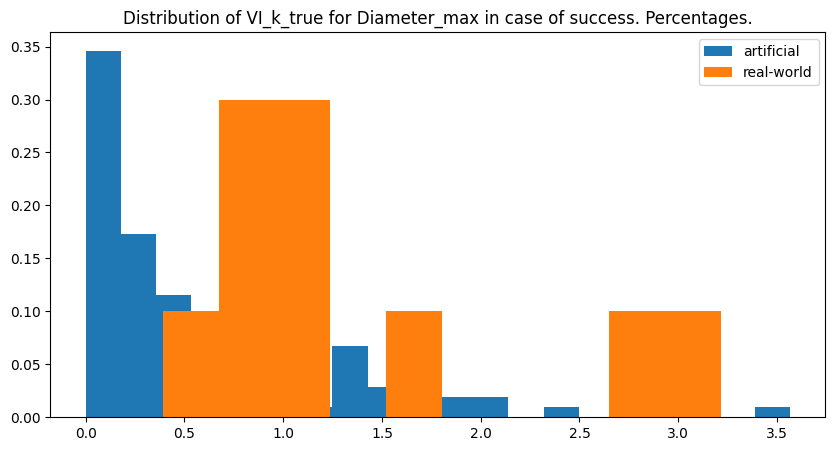

In [8]:
fig, ax = plt.subplots(figsize=(10,5))

n_success = len(VI_success_artificial)
weights = [1/n_success]*n_success
ax.hist(VI_success_artificial, weights=weights, bins= 20, label="artificial")

n_success = len(VI_success_real)
weights = [1/n_success]*n_success
ax.hist(VI_success_real, weights=weights, bins= 20, label="real-world")
ax.legend()
ax.set_title("Distribution of VI_k_true in case of success. Percentages")

CVIs = list(VI_success_cvi_artificial.keys())


for cvi in CVIs:
    fig, ax = plt.subplots(figsize=(10,5))

    n_success = len(VI_success_cvi_artificial[cvi])
    weights = [1/n_success]*n_success
    ax.hist(VI_success_cvi_artificial[cvi], weights=weights, bins=20, label="artificial")

    n_success = len(VI_success_cvi_real[cvi])
    if n_success:
        weights = [1/n_success]*n_success
        ax.hist(VI_success_cvi_real[cvi], weights=weights, label="real-world")

        ax.legend()
    ax.set_title(f"Distribution of VI_k_true for {cvi} in case of success. Percentages.")

In [19]:
def distrib_VI(
    source_number: int = 0,
    k_true: int = None,
    only_k_true: bool = False,
    VI_max: float = None,
    verbose: bool = False,
) -> Dict[str, List[float]]:
    """
    Find the VI distribution with respect to k.

    The VI used here is between the true clustering (with all different
    k_true values unless k_true is not None) and each clustering
    obtained with the different clustering methods (so not necessarily
    with k_true, unless only_k_true is True).

    Parameters
    ----------
    source_number : int, optional
        The source number (["artificial", "real-world", "UCR"])
    k_true : int, optional
        Filter experiments by k_true. If k_true is None, then all
        experiments are used. Default to None.
    only_k_true : bool, optional
        Filter VIs so that only the VIs of clusterings assuming k_true
        are taken into account. Default to False.
    VI_max : float, optional
        Filter experiments so that, only those with a VI_true <= VI_max
        are taken into account. if VI_max is None, then there is no
        filtering. Default to None.
    verbose : bool, optional
        Verbosity level.

    Returns
    -------
    Dict[str, List[float]]
        For each k, the complete list of VI values.
    """
    VI_distrib = {}

    path_root_res = "../res/"
    sources = ["artificial", "real-world", "UCR"]
    DATA_SOURCE = sources[source_number]
    RES_DIR = path_root_res + f'{DATA_SOURCE}/'
    FNAME_DATASET_EXPS = f"datasets_experiments_theory-{DATA_SOURCE}.txt"

    datasets = get_list_datasets(RES_DIR + FNAME_DATASET_EXPS)

    for d in datasets:

        # ----------- Going through all clustering methods -------------
        # For each dataset, find all experiments working on this dataset
        # but using different clustering methods (by filtering on the
        # filename)
        fnames = get_list_exp(
            dataset_name=d, res_dir=RES_DIR, suffix="_scored.json"
        )

        for fname in fnames:

            with open(RES_DIR + fname + ".json") as f_json:
                exp = json.load(f_json)

            if k_true is not None and int(exp["k"]) != k_true:
                continue

            true_k = str(exp["k"])
            vi_true = exp["VIs"][true_k]
            if VI_max is not None and vi_true > VI_max:
                continue

            if only_k_true:

                if vi_true is not None:
                    if true_k in VI_distrib:
                        VI_distrib[true_k].append(vi)
                    else:
                        VI_distrib[true_k] = [vi]
                else:
                    print("Is None")
            else:
                # VI of each assumption k for this clustering method
                for k, vi in exp["VIs"].items():

                    if vi is not None:
                        if k in VI_distrib:
                            VI_distrib[k].append(vi)
                        else:
                            VI_distrib[k] = [vi]
                    else:
                        print("Is None")
    if verbose:
        for k, vis in VI_distrib.items():
            print(k, min(vis))
    return VI_distrib

In [10]:
VI_distrib_artificial = distrib_VI(0)
VI_distrib_real = distrib_VI(1)

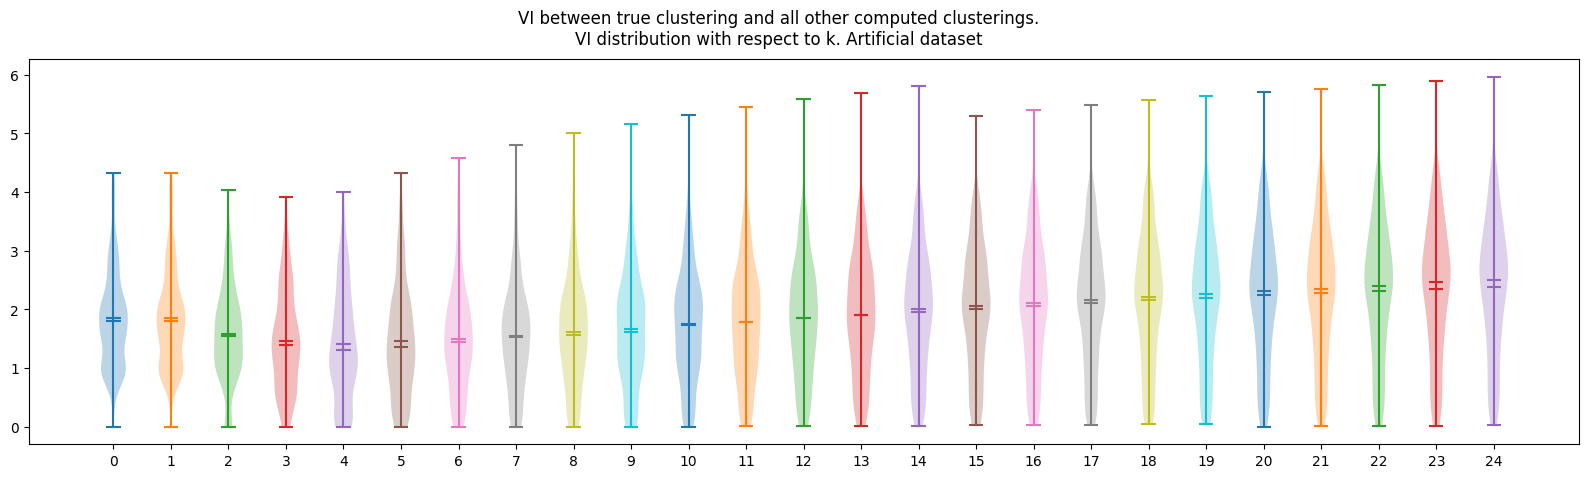

In [11]:
fig, ax = plt.subplots(figsize=(20,5))
for k, vis in VI_distrib_artificial.items():
    ax.violinplot(vis, positions=[int(k)], showmeans=True, showmedians=True, points=50)
title = (
    "VI between true clustering and all other computed clusterings.\n"
    + "VI distribution with respect to k. Artificial dataset"
)
ax.set_xticks(range(25))
fig.suptitle(title)
plt.show()

- Note that the case k=0 and k=1 have exactly the same violin, because they have exactly the same VI, because VI doesn't pay attention to the distances between datapoints but just datapoints' belonging to a given cluster. The case k=0 and k=1 have exactly the same datapoint distribution among the clusters (all datapoints in one cluster)
_________________________________

In [12]:
VI_distrib_artificial = distrib_VI(0, only_k_true=True)

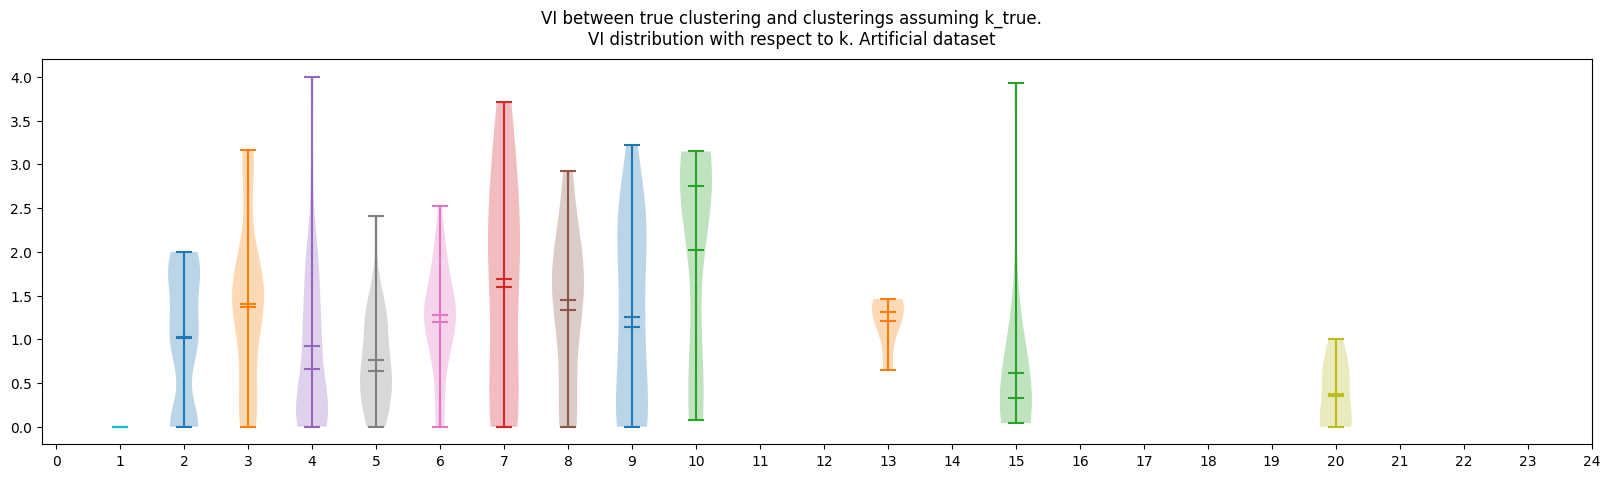

In [13]:
fig, ax = plt.subplots(figsize=(20,5))
for k, vis in VI_distrib_artificial.items():
    ax.violinplot(vis, positions=[int(k)], showmeans=True, showmedians=True, points=50)
title = (
    "VI between true clustering and clusterings assuming k_true.\n"
    + "VI distribution with respect to k. Artificial dataset"
)
ax.set_xticks(range(25))
fig.suptitle(title)
plt.show()

In [14]:
VI_distrib_real = distrib_VI(1, only_k_true=True)

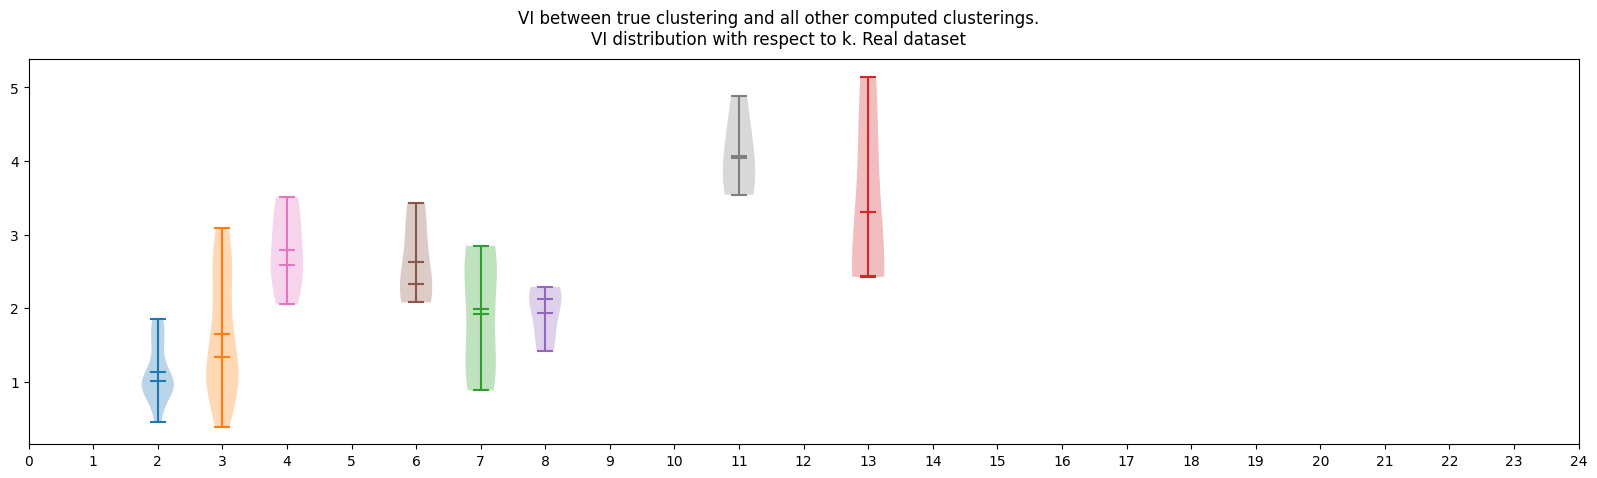

In [15]:
fig, ax = plt.subplots(figsize=(20,5))
for k, VIs in VI_distrib_real.items():
    ax.violinplot(VIs, positions=[int(k)], showmeans=True, showmedians=True, points=50)

title = (
    "VI between true clustering and all other computed clusterings.\n"
    + "VI distribution with respect to k. Real dataset"
)
ax.set_xticks(range(25))
fig.suptitle(title)
plt.show()

In [16]:
VI_distrib_artificial = distrib_VI(0, k_true=4, verbose=True)

0 1.1458767968189203
1 1.1458767968189203
2 0.6292203686787172
3 0.36572366863240013
4 -4.440892098500626e-16
5 0.00818213807758772
6 0.016361836733161716
7 0.015606213837294103
8 0.020805386189576502
9 0.02600890402345213
10 0.031210976270145796
11 0.036408694291766075
12 0.04160495504467532
13 0.05100475115368308
14 0.05620246917530203
15 0.06139726970956305
16 0.06659060706326514
17 0.07178686781617616
18 0.07698166835043452
19 0.10035591078552031
20 0.10554924813922106
21 0.11074111933841779
22 0.11593152139704443
23 0.121120451316854
24 0.1444680589616727


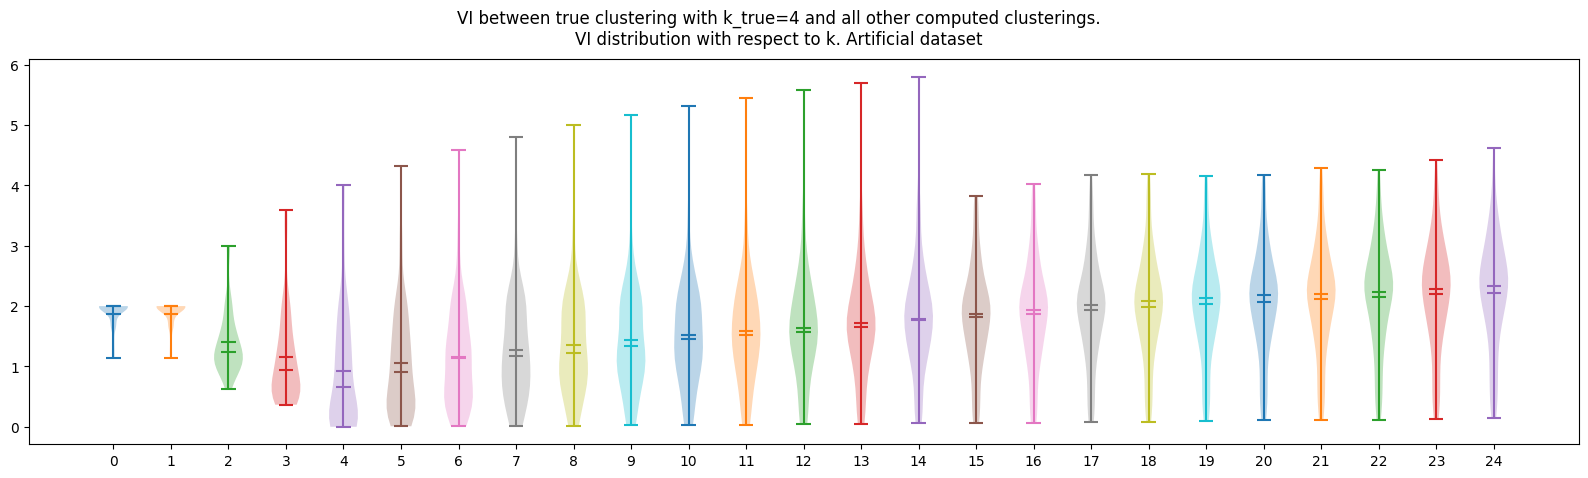

In [17]:
fig, ax = plt.subplots(figsize=(20,5))
for k, vis in VI_distrib_artificial.items():
    ax.violinplot(vis, positions=[int(k)], showmeans=True, showmedians=True, points=30)
title = (
    "VI between true clustering with k_true=4 and all other computed clusterings.\n"
    + "VI distribution with respect to k. Artificial dataset"
)
ax.set_xticks(range(25))
fig.suptitle(title)
plt.show()

In [20]:
VI_distrib_artificial = distrib_VI(0, k_true=4, VI_max=0.2, verbose=True)

0 1.6804820237218405
1 1.6804820237218405
2 0.7829855649792172
3 0.36572366863240013
4 -4.440892098500626e-16
5 0.00818213807758772
6 0.016361836733161716
7 0.024539090754272852
8 0.0327138949061494
9 0.047470089727483344
10 0.04905613255063912
11 0.057223555460793385
12 0.06538850733650392
13 0.07355098282920336
14 0.08171097656711979
15 0.0898684831551253
16 0.09811459315081539
17 0.10626960717027423
18 0.12098609288738604
19 0.12913359645198996
20 0.14383501177571167
21 0.15852632474380668
22 0.16666120027156994
23 0.17479353337933512
24 0.1829233184046859


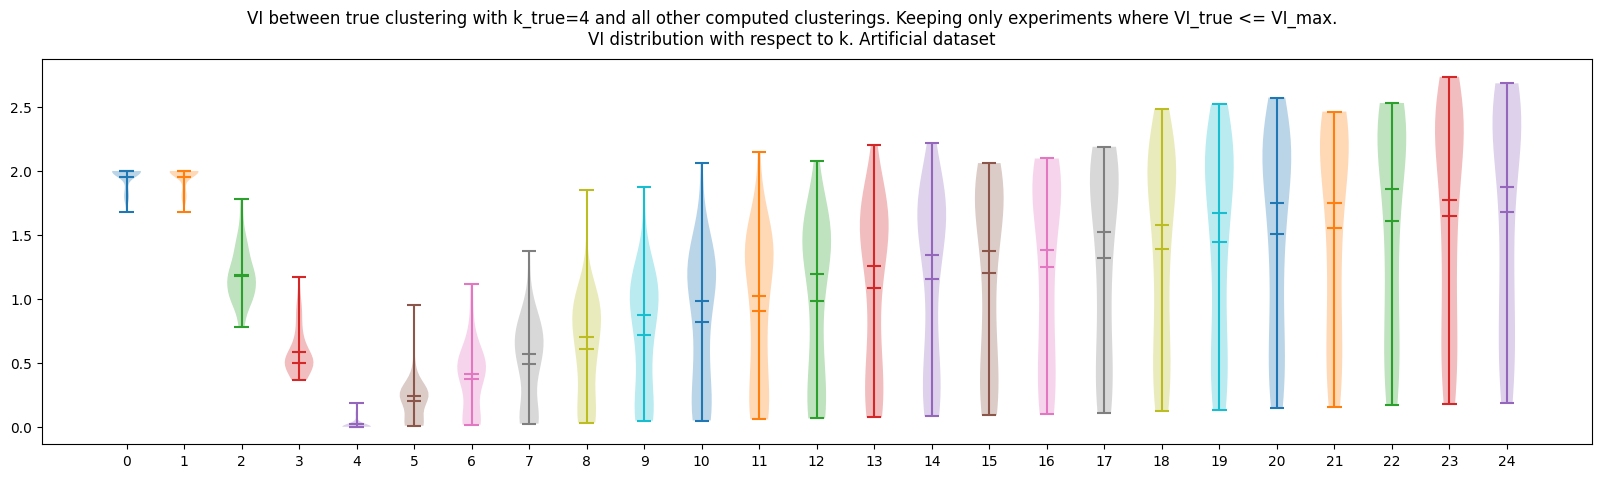

In [21]:
fig, ax = plt.subplots(figsize=(20,5))
for k, vis in VI_distrib_artificial.items():
    ax.violinplot(vis, positions=[int(k)], showmeans=True, showmedians=True, points=30)
title = (
    "VI between true clustering with k_true=4 and all other computed clusterings. Keeping only experiments where VI_true <= VI_max.\n"
    + "VI distribution with respect to k. Artificial dataset"
)
ax.set_xticks(range(25))
fig.suptitle(title)
plt.show()

In [22]:
VI_distrib_artificial = distrib_VI(0, k_true=2, verbose=True)

0 0.4689955935892812
1 0.4689955935892812
2 0.0
3 0.0022785605733695036
4 0.005239587145301261
5 0.007859184236552519
6 0.010507618402503471
7 0.013127084429828795
8 0.01574641933591847
9 0.018365623063414827
10 0.023246420224372732
11 0.025865492715867022
12 0.02848443391390032
13 0.03110324376096374
14 0.03375132065015363
15 0.03639927835243517
16 0.03901795679096898
17 0.04163650376336325
18 0.04850301868199636
19 0.05115085714997769
20 0.05172347978605418
21 0.05858880943060929
22 0.061236528616863684
23 0.06180915125293973
24 0.06445675111000115


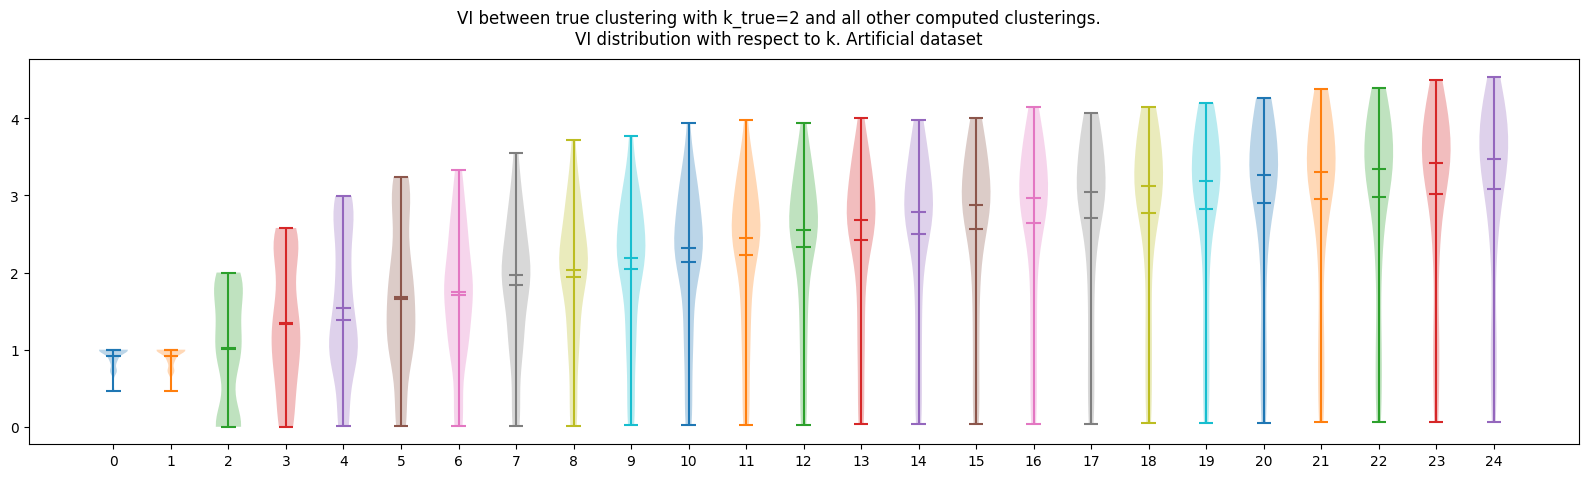

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
for k, vis in VI_distrib_artificial.items():
    ax.violinplot(vis, positions=[int(k)], showmeans=True, showmedians=True, points=30)
title = (
    "VI between true clustering with k_true=2 and all other computed clusterings.\n"
    + "VI distribution with respect to k. Artificial dataset"
)
ax.set_xticks(range(25))
fig.suptitle(title)
plt.show()

In [24]:
VI_distrib_artificial = distrib_VI(0, k_true=2, VI_max=0.2, verbose=True)

0 0.7219280948873623
1 0.7219280948873623
2 0.0
3 0.0022785605733695036
4 0.005239587145301261
5 0.007859184236552519
6 0.010507618402503471
7 0.013127084429828795
8 0.01574641933591847
9 0.018365623063414827
10 0.023246420224372732
11 0.025865492715867022
12 0.02848443391390032
13 0.03110324376096374
14 0.03375132065015363
15 0.03639927835243517
16 0.03901795679096898
17 0.04163650376336325
18 0.04850301868199636
19 0.05115085714997769
20 0.05172347978605418
21 0.05858880943060929
22 0.061236528616863684
23 0.06180915125293973
24 0.06445675111000115


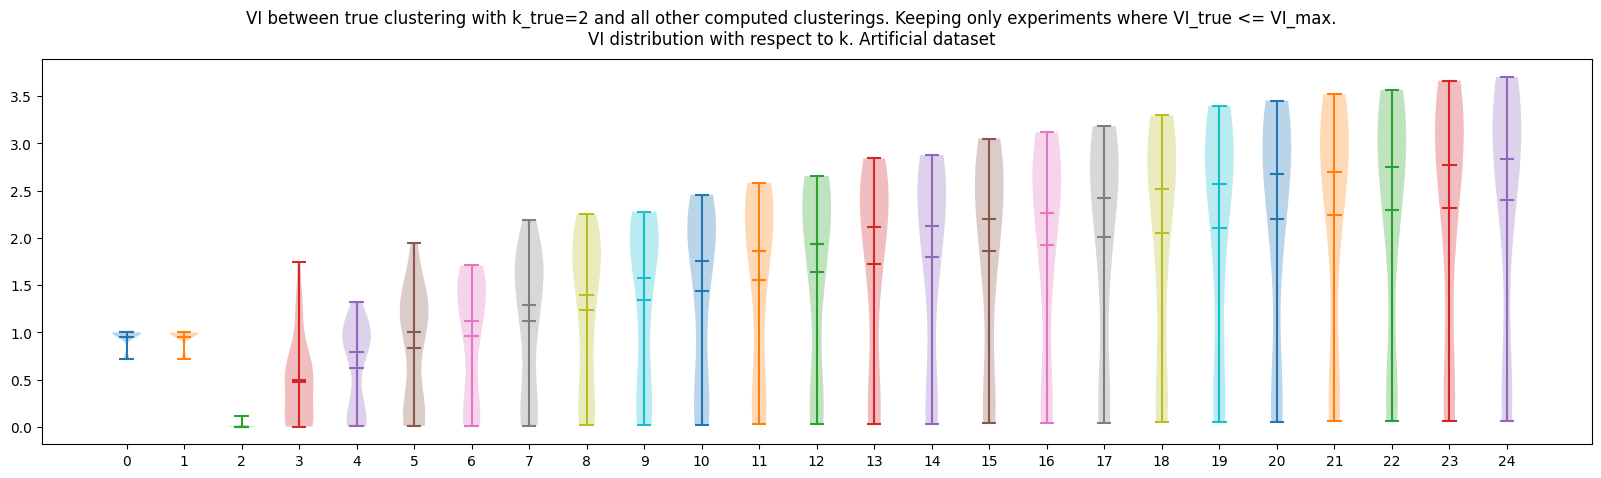

In [25]:
fig, ax = plt.subplots(figsize=(20,5))
for k, vis in VI_distrib_artificial.items():
    ax.violinplot(vis, positions=[int(k)], showmeans=True, showmedians=True, points=30)
title = (
    "VI between true clustering with k_true=2 and all other computed clusterings. Keeping only experiments where VI_true <= VI_max.\n"
    + "VI distribution with respect to k. Artificial dataset"
)
ax.set_xticks(range(25))
fig.suptitle(title)
plt.show()

In [26]:
VI_distrib_artificial = distrib_VI(0, k_true=15, verbose=True)

0 3.9051305673219483
1 3.9051305673219483
2 2.913970476706698
3 2.4123078558388014
4 2.018968826384589
5 1.7241284097072818
6 1.4069987597456919
7 1.2171135760303535
8 0.9490740305259493
9 0.8168514278622308
10 0.700459151304619
11 0.5820730446091016
12 0.3999999999999986
13 0.2666666666666657
14 0.15588157608952002
15 0.04142423712225174
16 0.07221911526571922
17 0.0817707404722352
18 0.08529434649109469
19 0.08332863511023714
20 0.08948888538284372
21 0.09302802413962041
22 0.09342715765481113
23 0.09698636577861475
24 0.1068578450599782


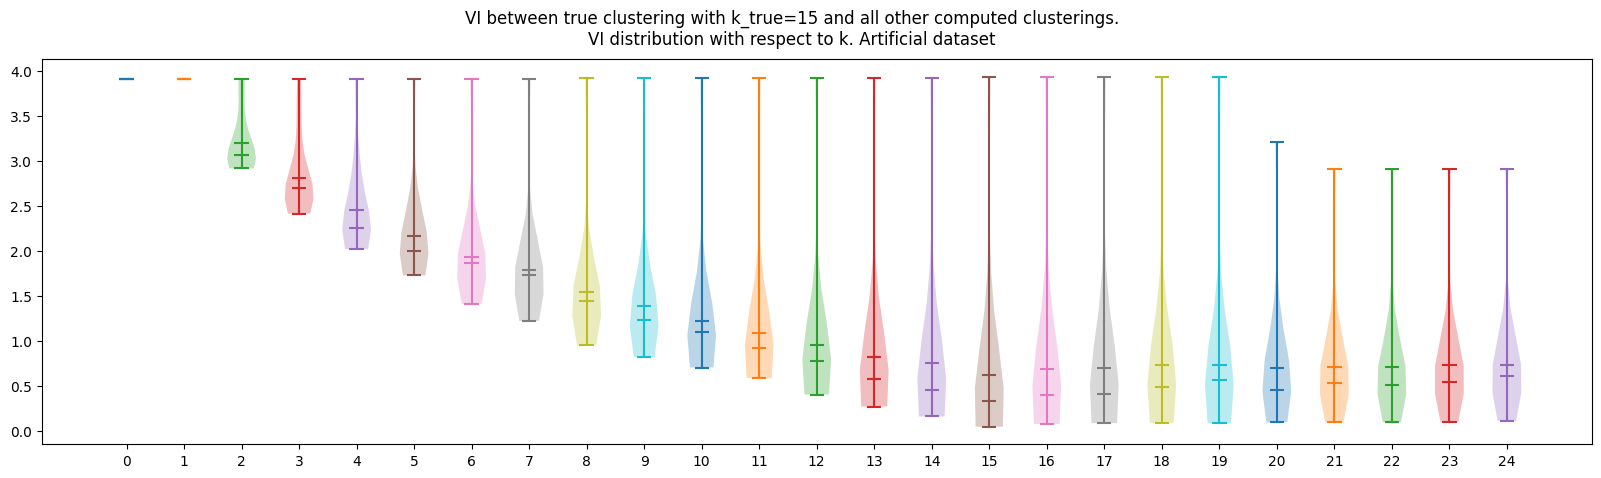

In [27]:
fig, ax = plt.subplots(figsize=(20,5))
for k, vis in VI_distrib_artificial.items():
    ax.violinplot(vis, positions=[int(k)], showmeans=True, showmedians=True, points=10)
title = (
    "VI between true clustering with k_true=15 and all other computed clusterings.\n"
    + "VI distribution with respect to k. Artificial dataset"
)
ax.set_xticks(range(25))
fig.suptitle(title)
plt.show()

In [28]:
VI_distrib_artificial = distrib_VI(0, k_true=15, VI_max=0.2, verbose=True)

0 3.9051305673219483
1 3.9051305673219483
2 2.913970476706698
3 2.4123078558388014
4 2.018968826384589
5 1.7241284097072818
6 1.4069987597456919
7 1.2171135760303535
8 0.9490740305259493
9 0.8168514278622308
10 0.700459151304619
11 0.5820730446091016
12 0.3999999999999986
13 0.2666666666666657
14 0.15588157608952002
15 0.04142423712225174
16 0.07221911526571922
17 0.0817707404722352
18 0.08529434649109469
19 0.08332863511023714
20 0.08948888538284372
21 0.09302802413962041
22 0.09342715765481113
23 0.09698636577861475
24 0.1068578450599782


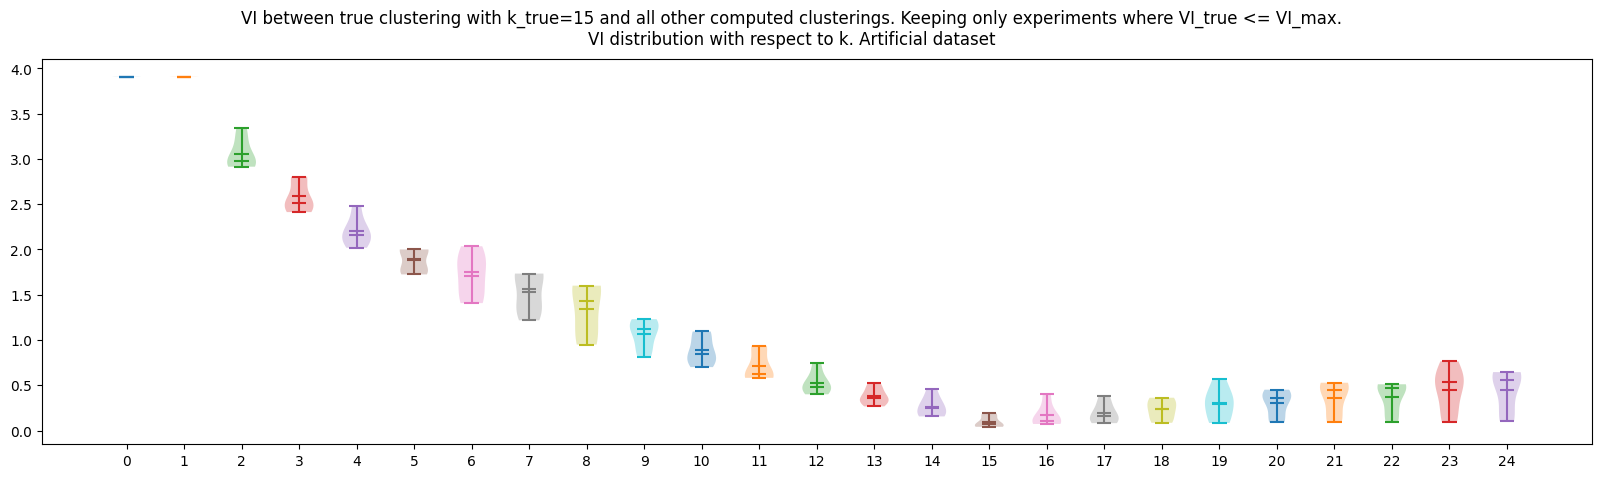

In [29]:
fig, ax = plt.subplots(figsize=(20,5))
for k, vis in VI_distrib_artificial.items():
    ax.violinplot(vis, positions=[int(k)], showmeans=True, showmedians=True, points=30)
title = (
    "VI between true clustering with k_true=15 and all other computed clusterings. Keeping only experiments where VI_true <= VI_max.\n"
    + "VI distribution with respect to k. Artificial dataset"
)
ax.set_xticks(range(25))
fig.suptitle(title)
plt.show()

## Note

From Meila: 

> "Splitting (or merging) smaller clusters has less impact on the VI than splitting or merging larger ones" 